In [52]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.datasets import load_iris
from scipy.stats import entropy, ks_2samp, ttest_ind

In [74]:
def kl_divergence(p, q):
    return entropy(p, q)

def plot_densidades(df1, df2, column):

    # Crea una figura y un eje
    fig, ax = plt.subplots()

    # Dibuja la densidad de 'df1' en azul con estilo de línea discontinuo y transparencia 0.5
    sns.kdeplot(df1[column], label='DataFrame 2', color='blue', linestyle='--', alpha=0.5, ax=ax)

    # Dibuja la densidad de 'df2' en rojo con estilo de línea sólida y ancho de línea 2
    sns.kdeplot(df2[column], label='DataFrame 2', color='red', linestyle='-', linewidth=2, ax=ax)

    # Añade un título y etiquetas a los ejes
    ax.set_title('Densidad de la columna')
    ax.set_xlabel('Valor de la columna')
    ax.set_ylabel('Densidad')

    # Añade una leyenda
    ax.legend()

    # Muestra el gráfico
    plt.show()

In [43]:
# Definir los argumentos del DAG
default_args = {
    'owner': 'Oscar C',
    'depends_on_past': False,
    'email_on_failure': False,
    'email': ['oecorrechag@gmail.com'],
    'retries': 1,
    'start_date': datetime(2024, 5, 20),
    'retry_delay': timedelta(minutes=1),
}

In [44]:
# load data
iris = load_iris()

# Crear el DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

X = df.drop("target", axis=1)
y = df["target"]

# Agregar ruido aleatorio a las características
noise = np.random.normal(0, 1, X.shape)
X_noisy = X + noise
X_noisy['target'] = y

# Prueba con datos totalmente diferentes 

dos datasets:

- df
- X_noisy

Se realizaran las pruebas:

-
-
-
    
Y finalmente la eleccion se hara por votacion

In [110]:
def test_kulball(df1, df2):

    threshold_kl = 0.1  # Define un umbral apropiado para tu contexto
    n = df1.shape[1]
    t = 0

    for columns in df1.columns:
                
        historical_feature = df1[columns].value_counts(normalize=True)
        recent_feature = df2[columns].value_counts(normalize=True)

        all_index = historical_feature.index.union(recent_feature.index)
        p = historical_feature.reindex(all_index, fill_value=0)
        q = recent_feature.reindex(all_index, fill_value=0)

        kl_div = kl_divergence(p, q)

        if kl_div > threshold_kl:
            t = t + 1
            # print(columns)
        else:
            t = t

    s = t / n

    return s

test_kulball(df, X_noisy)

0.8

In [111]:
def test_shapiro(df1, df2):

    threshold_p_value = 0.05  # Nivel de significancia
    n = df1.shape[1]
    t = 0

    for columns in df1.columns:
                
        ks_stat, p_value = ks_2samp(df1[columns], df2[columns])

        if p_value < threshold_p_value:
            t = t + 1
            # print(columns)
        else:
            t = t

    s = t / n

    return s

test_shapiro(df, X_noisy)

0.6

In [97]:
def testeo_general(df1, df2):
    v1 = test_kulball(df1, df2)
    v2 = test_shapiro(df1, df2)

    vf = (v1+v2)/2

    return vf

testeo_general(df, X_noisy)

0.7

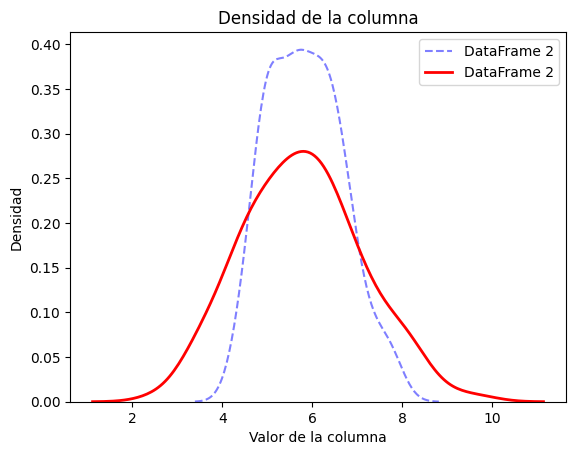

In [103]:
plot_densidades(df, X_noisy, column='sepal_length')

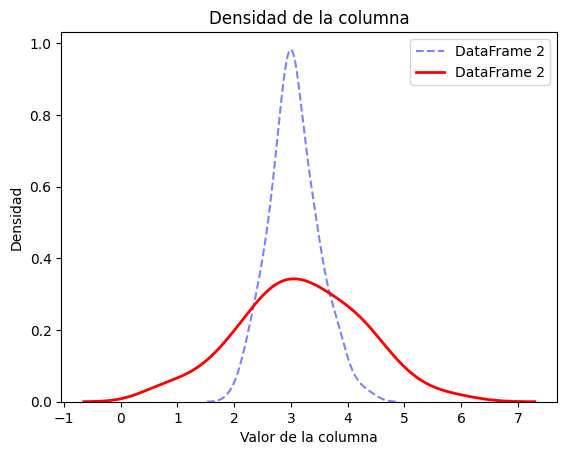

In [104]:
plot_densidades(df, X_noisy, column='sepal_width')

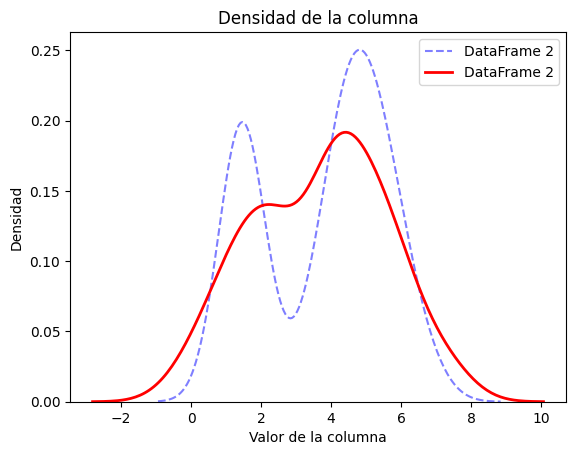

In [105]:
plot_densidades(df, X_noisy, column='petal_length')

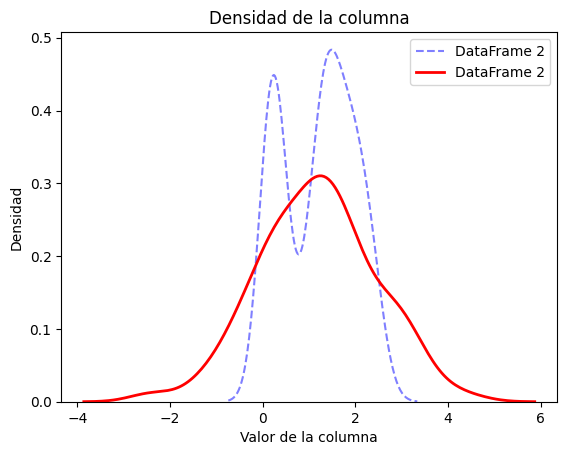

In [106]:
plot_densidades(df, X_noisy, column='petal_width')

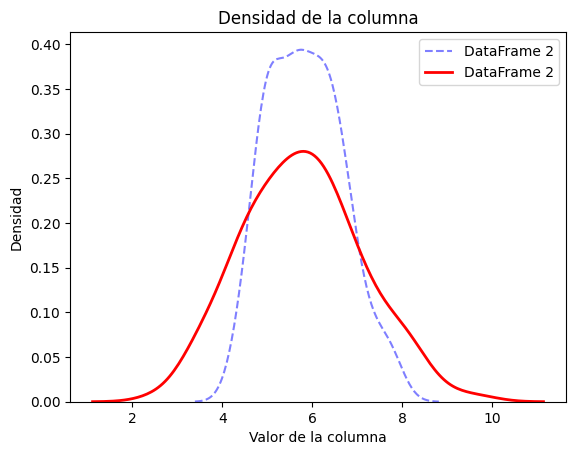

In [107]:
plot_densidades(df, X_noisy, column='sepal_length')

In [ ]:
print('ok_')